In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('kc_cleaned_data.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,has_basement,is_cust_build
0,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,...,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650,0,0
1,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,...,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639,1,0
2,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,...,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062,0,0
3,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,...,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000,1,0
4,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,...,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503,0,0


In [3]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'has_basement', 'is_cust_build'],
      dtype='object')

# Finding features that positively correlate to price (leaving in location)

In [4]:
feats = ['price', 'is_cust_build', 'grade', 
        'view', 'waterfront', 'lat', 'long', 'zipcode',
        'sqft_living', 'bedrooms', 'bathrooms', 
        'floors', 'sqft_living15', 'sqft_above', 'date']

In [5]:
corr = df[feats].corr()
corr

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above
price,1.000000,0.347742,0.667951,0.393497,0.264306,0.306692,0.022036,-0.053402,0.701917,0.308787,0.525906,0.256804,0.585241,0.605368
is_cust_build,0.347742,1.000000,0.262441,0.125607,0.076735,0.020536,0.026599,-0.035377,0.274177,0.072133,0.183281,0.058319,0.198618,0.252913
grade,0.667951,0.262441,1.000000,0.249082,0.082818,0.113575,0.200341,-0.185771,0.762779,0.356563,0.665838,0.458794,0.713867,0.756073
view,0.393497,0.125607,0.249082,1.000000,0.380543,0.006321,-0.077702,0.085059,0.281715,0.078354,0.186016,0.028414,0.278928,0.166017
waterfront,0.264306,0.076735,0.082818,0.380543,1.000000,-0.012157,-0.037628,0.028923,0.104637,-0.002127,0.063629,0.020797,0.083823,0.071778
lat,0.306692,0.020536,0.113575,0.006321,-0.012157,1.000000,-0.135371,0.266742,0.052155,-0.009951,0.024280,0.049239,0.048679,-0.001199
long,0.022036,0.026599,0.200341,-0.077702,-0.037628,-0.135371,1.000000,-0.564259,0.241214,0.132054,0.224903,0.125943,0.335626,0.344842
zipcode,-0.053402,-0.035377,-0.185771,0.085059,0.028923,0.266742,-0.564259,1.000000,-0.199802,-0.154092,-0.204786,-0.059541,-0.279299,-0.261570
sqft_living,0.701917,0.274177,0.762779,0.281715,0.104637,0.052155,0.241214,-0.199802,1.000000,0.578212,0.755758,0.353953,0.756402,0.876448
bedrooms,0.308787,0.072133,0.356563,0.078354,-0.002127,-0.009951,0.132054,-0.154092,0.578212,1.000000,0.514508,0.177944,0.393406,0.479386


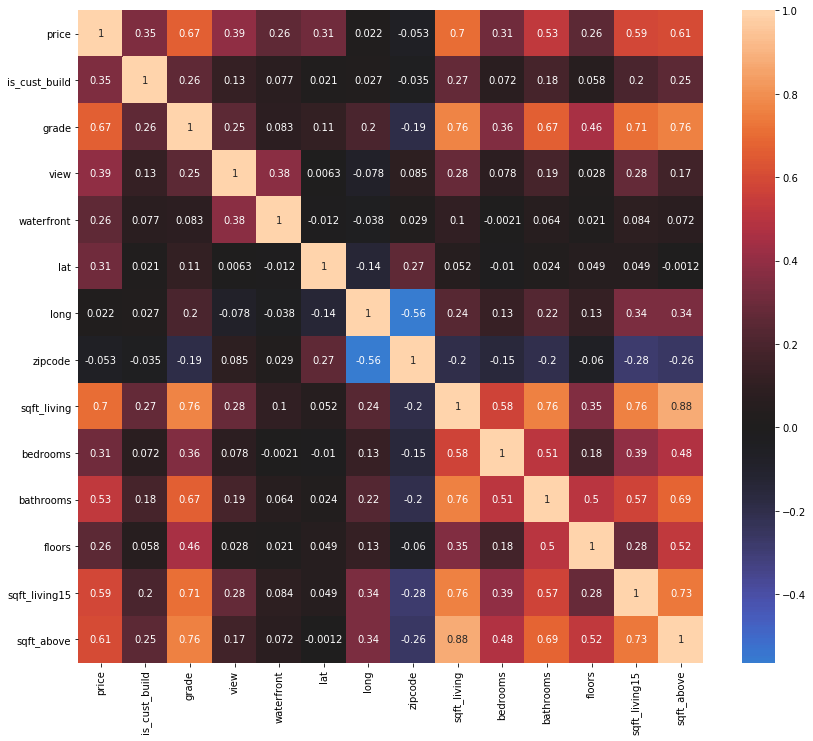

In [6]:
plt.figure(figsize=(14,12))
sns.heatmap(corr, center=0, annot=True);

In [7]:
df_high_corr_and_location=df[feats]
df_high_corr_and_location.head()

,price,is_cust_build,grade,view,waterfront,lat,long,zipcode,sqft_living,bedrooms,bathrooms,floors,sqft_living15,sqft_above,date
0,221900.0,0,7,0.0,0.0,47.5112,-122.257,98178,1180,3,1.00,1.0,1340,1180,10/13/2014
1,538000.0,0,7,0.0,0.0,47.7210,-122.319,98125,2570,3,2.25,2.0,1690,2170,12/9/2014
2,180000.0,0,6,0.0,0.0,47.7379,-122.233,98028,770,2,1.00,1.0,2720,770,2/25/2015
3,604000.0,0,7,0.0,0.0,47.5208,-122.393,98136,1960,4,3.00,1.0,1360,1050,12/9/2014
4,510000.0,0,8,0.0,0.0,47.6168,-122.045,98074,1680,3,2.00,1.0,1800,1680,2/18/2015


In [8]:
df_high_corr_and_location.to_csv('kc_housing_data_location_and_high_correlation.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000249A6B17E08>,
      dtype=object)

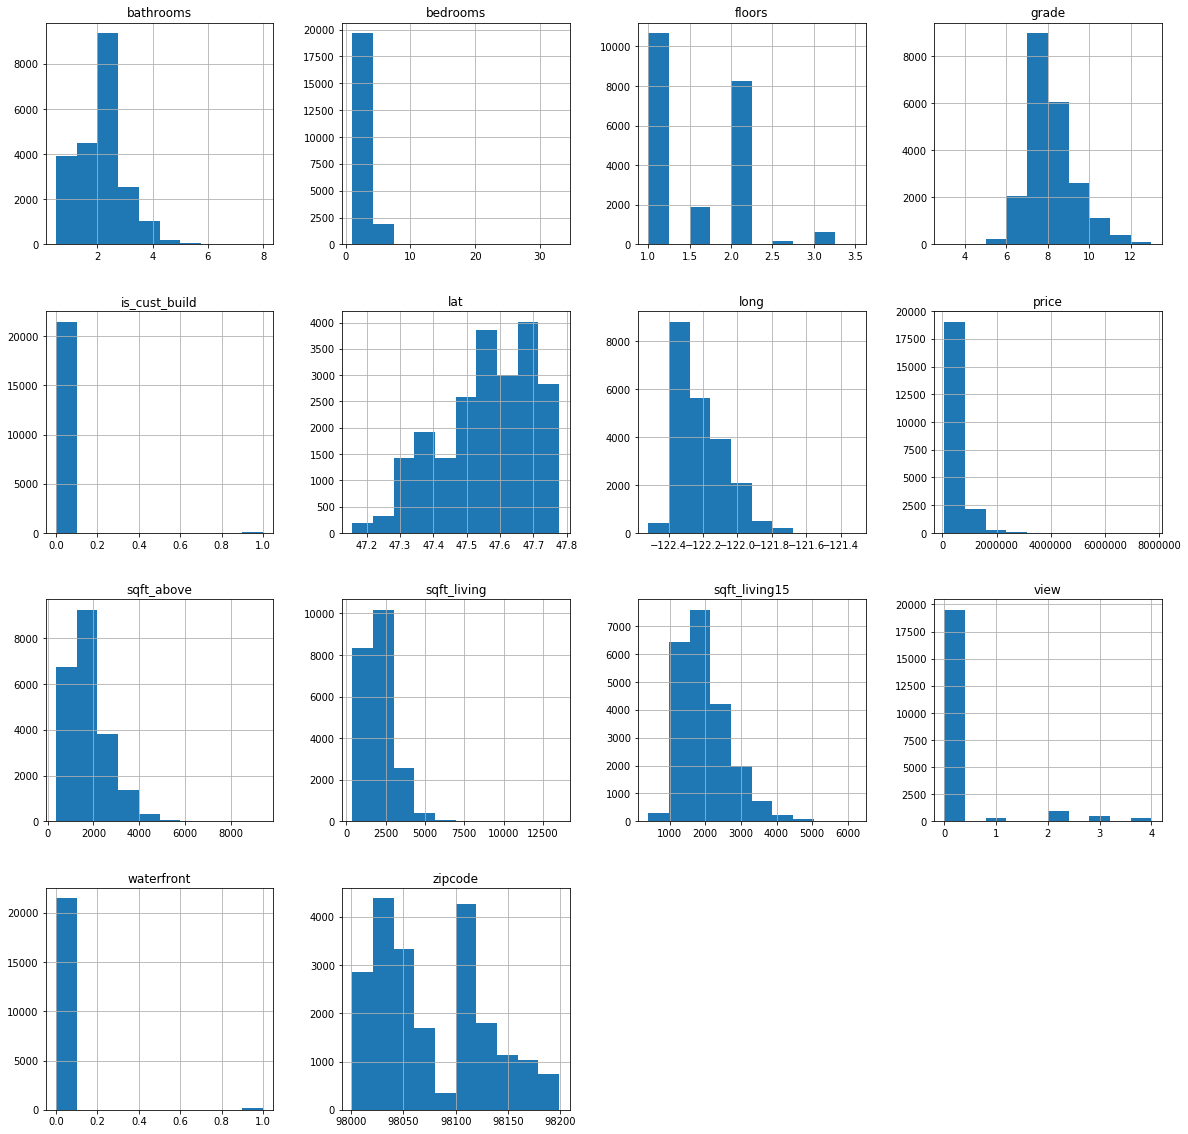

In [9]:
df_high_corr_and_location.hist(figsize=(20,20))

In [10]:
df_high_corr_and_location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   is_cust_build  21597 non-null  int64  
 2   grade          21597 non-null  int64  
 3   view           21597 non-null  float64
 4   waterfront     21597 non-null  float64
 5   lat            21597 non-null  float64
 6   long           21597 non-null  float64
 7   zipcode        21597 non-null  int64  
 8   sqft_living    21597 non-null  int64  
 9   bedrooms       21597 non-null  int64  
 10  bathrooms      21597 non-null  float64
 11  floors         21597 non-null  float64
 12  sqft_living15  21597 non-null  int64  
 13  sqft_above     21597 non-null  int64  
 14  date           21597 non-null  object 
dtypes: float64(7), int64(7), object(1)
memory usage: 2.5+ MB


# Identifying Categorical Data

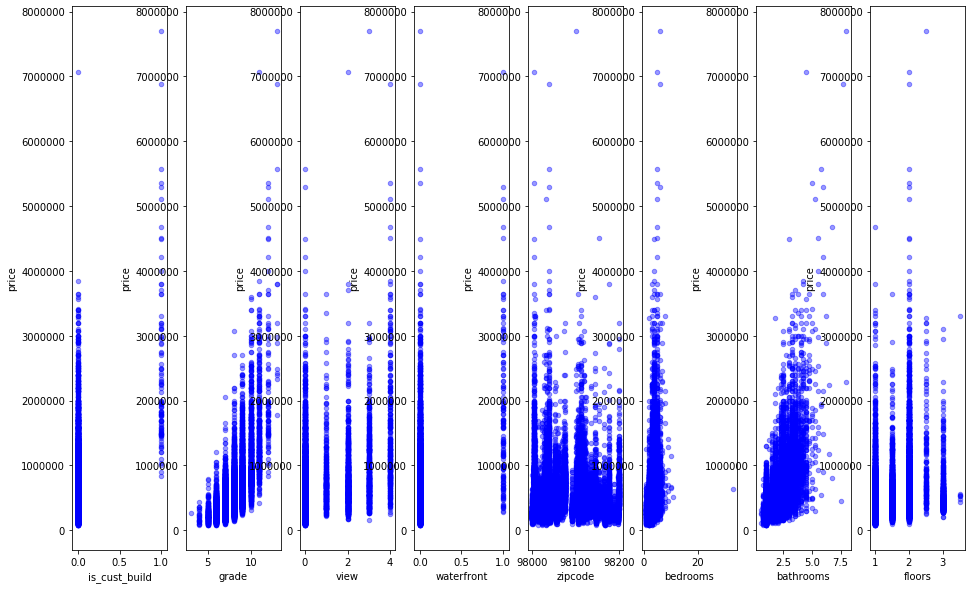

In [22]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(16,10))

for xcol, ax in zip(['is_cust_build', 'grade', 'view', 'waterfront', 'zipcode', 'bedrooms', 'bathrooms', 'floors'], axes):
    df_high_corr_and_location.plot(kind='scatter', x=xcol, y='price', ax=ax, alpha=0.4, color='b')

In [27]:
from statsmodels.formula.api import ols

In [29]:
outcome = 'price'
x_cols = ['is_cust_build', 'grade', 
        'view', 'waterfront', 'lat', 'long', 'zipcode',
        'sqft_living', 'bedrooms', 'bathrooms', 
        'floors', 'sqft_living15', 'sqft_above']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_high_corr_and_location).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     3597.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:04:04   Log-Likelihood:            -2.9494e+05
No. Observations:               21597   AIC:                         5.899e+05
Df Residuals:                   21583   BIC:                         5.900e+05
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -2.929e+07    2.8e+06    -10.474      0.000   -3.48e+07   -2.38e+07
is_cust_build  6.874e+05   2.17e+04     31.742      0.000    6.45e+05     7.3e+05
grade          6.972e+04   2165.661     32.193      0.000    6.55e+04     7.4e+04
view           6.205e+04   2161.607     28.706      0.000    5.78e+04    6.63e+04
waterfront     6.094e+05   1.86e+04     32.772      0.000    5.73e+05    6.46e+05
lat            6.794e+05   1.08e+04     62.880      0.000    6.58e+05    7.01e+05
long          -3.549e+05   1.28e+04    -27.659      0.000    -3.8e+05    -3.3e+05
zipcode        -476.4481     33.471    -14.235      0.000    -542.054    -410.842
sqft_living     170.1871      4.455     38.205      0.000     161.456     178.918
bedrooms       -2.34e+04   1942.344    -12.048      0.000   -2.72e+04   -1.96e+04
bathrooms      2190.9453   3159.821      0.693      0.488   -4002.538    8384.428
floors        -2.348e+04   3574.703     -6.569      0.000   -3.05e+04   -1.65e+04
sqft_living15    25.8525      3.533      7.316      0.000      18.927      32.778
sqft_above       16.6705      4.457      3.740      0.000       7.935      25.406
==============================================================================
Omnibus:                    15480.949   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           914819.170
Skew:                           2.852   Prob(JB):                         0.00
Kurtosis:                      34.370   Cond. No.                     1.95e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.95e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [31]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('is_cust_build', 1.1215054559487472),
 ('grade', 142.55989868968143),
 ('view', 1.4820189223173181),
 ('waterfront', 1.183844807878621),
 ('lat', 132326.71710328522),
 ('long', 1245096.2534110222),
 ('zipcode', 1386942.0576645695),
 ('sqft_living', 50.96460103420471),
 ('bedrooms', 23.353910136277232),
 ('bathrooms', 25.30771380471731),
 ('floors', 16.078059207204493),
 ('sqft_living15', 27.002447703815243),
 ('sqft_above', 38.202554263110216)]

### Round 2

In [38]:
outcome = 'price'
x_cols = ['view', 'waterfront',
        'sqft_living', 'bedrooms', 'bathrooms', 
        'floors', 'sqft_living15']
predictors = '+'.join(x_cols)
formula = outcome + '~' + predictors
model = ols(formula=formula, data=df_high_corr_and_location).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.563
Model:                            OLS   Adj. R-squared:                  0.562
Method:                 Least Squares   F-statistic:                     3967.
Date:                Mon, 01 Jun 2020   Prob (F-statistic):               0.00
Time:                        10:11:58   Log-Likelihood:            -2.9846e+05
No. Observations:               21597   AIC:                         5.969e+05
Df Residuals:                   21589   BIC:                         5.970e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      1.899e+04   7992.354      2.376      0.018    3321.552    3.47e+04
view            7.04e+04   2454.643     28.679      0.000    6.56e+04    7.52e+04
waterfront     6.011e+05   2.19e+04     27.501      0.000    5.58e+05    6.44e+05
sqft_living     249.7373      3.684     67.793      0.000     242.517     256.958
bedrooms      -4.352e+04   2243.304    -19.400      0.000   -4.79e+04   -3.91e+04
bathrooms      7262.4547   3609.808      2.012      0.044     186.964    1.43e+04
floors         1.039e+04   3577.924      2.903      0.004    3374.557    1.74e+04
sqft_living15    48.9323      3.723     13.143      0.000      41.635      56.230
==============================================================================
Omnibus:                    13954.225   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           550314.473
Skew:                           2.552   Prob(JB):                         0.00
Kurtosis:                      27.197   Cond. No.                     4.06e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [39]:
X = df[x_cols]
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(x_cols, vif))

[('view', 1.407762101477644),
 ('waterfront', 1.1801192271264125),
 ('sqft_living', 22.586140279642912),
 ('bedrooms', 14.04702820963141),
 ('bathrooms', 24.032132594787825),
 ('floors', 10.092436168997423),
 ('sqft_living15', 18.497062829720715)]

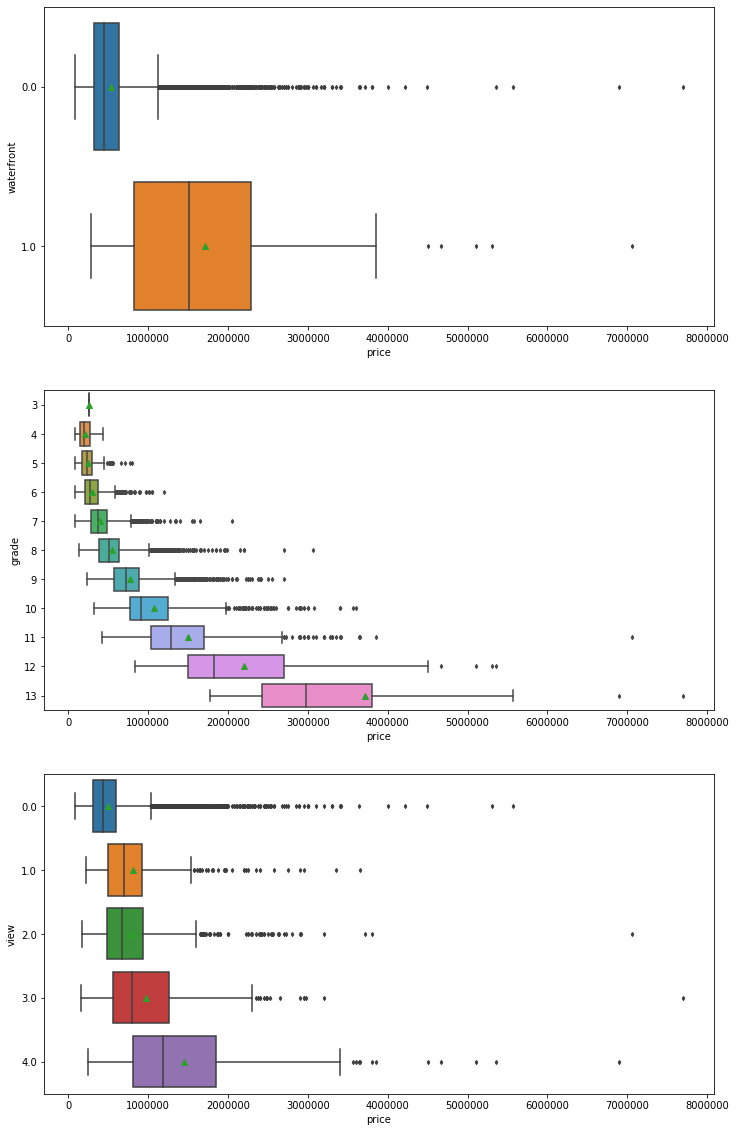

In [51]:
fig, axarr = plt.subplots(3, figsize=(12,20))

sns.boxplot(y = 'waterfront', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[0])

sns.boxplot(y = 'grade', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[1])

sns.boxplot(y = 'view', x = 'price', data = df_high_corr_and_location,width = 0.8,orient = 'h', showmeans = True, fliersize = 3, ax = axarr[2])


plt.show()